### Assignment 1: Implementation of Ridge Regression from scratch and comparison with scikit-learn class

In [1]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_regression(n_samples=200, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def ridge_regression(X, y, alpha):
    n_features = X.shape[1]
    I = np.identity(n_features)
    beta = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
    return beta

In [4]:
alpha = 1.0

In [5]:
beta_manual = ridge_regression(X_train, y_train, alpha)

In [6]:
y_pred_manual = X_test @ beta_manual

In [7]:
ridge = Ridge(alpha=alpha, fit_intercept=False)

In [8]:
ridge.fit(X_train, y_train)

Ridge(fit_intercept=False)

In [9]:
y_pred_sklearn = ridge.predict(X_test)

In [10]:
print("Manual Ridge MSE:", mean_squared_error(y_test, y_pred_manual))
print("Sklearn Ridge MSE:", mean_squared_error(y_test, y_pred_sklearn))

Manual Ridge MSE: 108.42363541177565
Sklearn Ridge MSE: 108.42363541177538


### Assignment 2: Lasso Regression and feature selection

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [13]:
X, y = make_regression(n_samples=200, n_features=50, n_informative=5, noise=10, random_state=42)

In [14]:
alphas = [0.01, 0.1, 1, 10]

In [15]:
num_zero_coeffs = []

In [16]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    num_zero = np.sum(lasso.coef_ == 0)
    num_zero_coeffs.append(num_zero)
    print(f"Alpha={alpha}, Zero Coefficients={num_zero}")

Alpha=0.01, Zero Coefficients=0
Alpha=0.1, Zero Coefficients=7
Alpha=1, Zero Coefficients=40
Alpha=10, Zero Coefficients=48


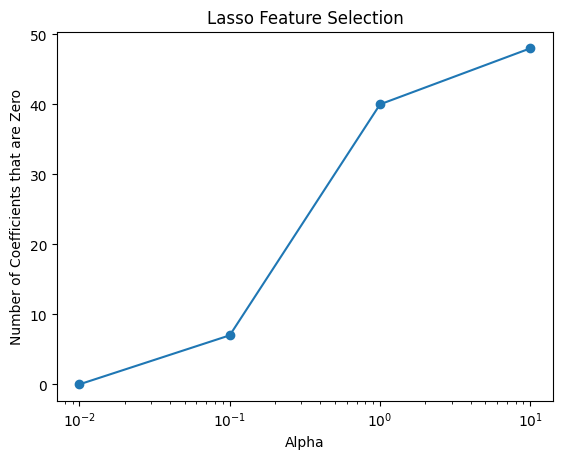

In [17]:
plt.plot(alphas, num_zero_coeffs, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Number of Coefficients that are Zero")
plt.title("Lasso Feature Selection")
plt.xscale("log")
plt.show()